## Step 1. Import libraries

**The user needs to install essential packages by call *InstallPackage.ipynb* for the first time to use this ROM GUI.  Assuming the source script *pySOFC.py* is in the same directory of the ROM GUI, the user can run the cell to import the source script and other libraries.**

In [1]:
import sys
import time
import getpass
import pySOFC_v12_Release_v1 as pys

Instructions for updating:
non-resource variables are not supported in the long term


## Step 2. Prepare cases

**The figure below shows an example conceptual design of the "NGFC system", the section in the dashline is the "SOFC stack".  If only the part shown in the dash line box is modeled, please go to *Step 2a* (SOFC stack). If the whole system shown in the figure is modeled, please go to *Step 2b* (NGFC/IGFC system).**
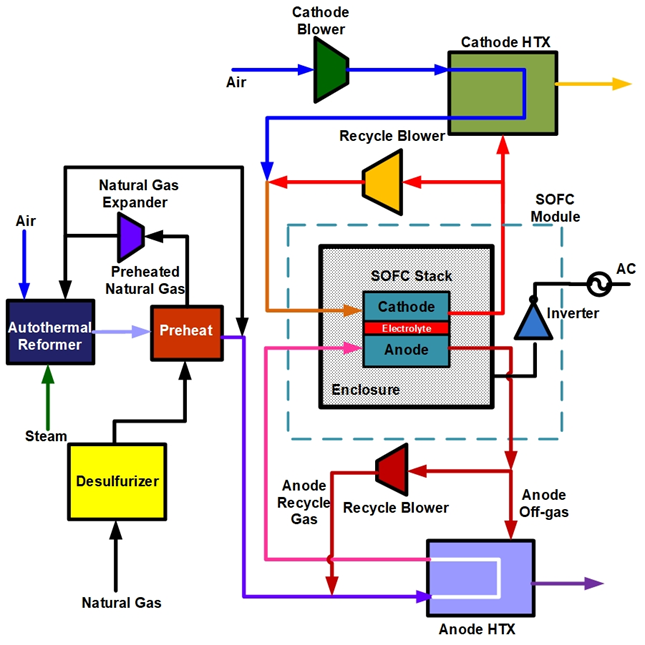

### Step 2a. SOFC stack only (or without "wrapper")
**In this step, it will generate ROM input samples by Latin Hypercube Sampling for assigned input variables, and prepare all the simulation cases according to the samples within the SOFC stack only**

* Run the cell below to **Display All the Input Variable Names**
    * <font color = 'blue'>display</font>: = <font color = 'green'>True</font> means displaying the variables

In [2]:
display = True
options = pys.variable_options(display)

Options of input variable:
1 : Average_CellVoltage, [V]	
2 : Average_CurrentDensity, [A/m^2]	
3 : BackEnvironmentT, [C]	
4 : BottomEnvironmentT, [C]	
5 : CellFuelFlowRate, [mol/s]	
6 : CellOxidantFlowRate, [mol/s]	
7 : FrontEnvironmentT, [C]	
8 : Fuel_Utilization, [-]	
9 : FuelH2, [mol/s]	
10 : FuelH2O, [mol/s]	
11 : FuelCO, [mol/s]	
12 : FuelCO2, [mol/s]	
13 : FuelCH4, [mol/s]	
14 : FuelN2, [mol/s]	
15 : FuelTemperature, [C]	
16 : FuelTOnTop, [C]	
17 : FuelRecyclePercent, [%]	
18 : FuelHTXEffectiveness, [-]	
19 : FuelNGTemperature, [C]	
20 : FuelNGHTXDeltaT, [C]	
21 : Internal_Reforming, [-]	
22 : nCells, [-]	
23 : Oxidant_Recirculation, [-]	
24 : OxidantRecyclePercent, [%]	
25 : OxygenToCarbon_Ratio, [-]	
26 : OxidantO2, [mol/s]	
27 : OxidantN2, [mol/s]	
28 : OxidantH2O, [mol/s]	
29 : OxidantCO2, [mol/s]	
30 : OxidantAr, [mol/s]	
31 : OxidantTemperature, [C]	
32 : OxidantTOnTop, [C]	
33 : PreReform, [-]	
34 : SideEnvironmentT, [C]	
35 : Simulation_Option, [-]	
36 : Stack_Fuel_Utiliza

* Run the cell below to **Perform Latin-Hypercube Sampling**
    * <font color = 'blue'>work_path</font>: the working directory which contains the baseline file and "VoltageOnCurrent.dat"
    * <font color = 'blue'>source_path</font>: the source directory which contains the executables and essential libraries
    * <font color = 'blue'>numvar</font>: number of the input variables
    * <font color = 'blue'>numsample</font>: number of samples
    * <font color = 'blue'>listvar</font>: the index of variables according to the resutls of last cell
    * <font color = 'blue'>listmin</font>: the minimums of the input variables
    * <font color = 'blue'>listmax</font>: the maximums of the input variables 

In [3]:
work_path = './Test_NW'
source_path = './source'
numvar = 3
numsample =200
listvar = [1, 31, 15]
listmin = [0.6, 600, 600]
listmax = [0.9, 800, 900]
pys.LHSampling(work_path, numvar, numsample, listvar, listmin, listmax)

############################################################            
Conducts Latin Hypercube Sampling            
############################################################
Created given.dat
Given vairables and limits:
1 : Average_CellVoltage 
	Min:  0.6 	Max:  0.9 	 200  Samples	
2 : OxidantTemperature 
	Min:  600.0 	Max:  800.0 	 200  Samples	
3 : FuelTemperature 
	Min:  600.0 	Max:  900.0 	 200  Samples	
Created LHS.dat
End of code



* Run the cell below to **Create Cases**
    * <font color = 'blue'>inputbasefilename</font>: directory of baseline file

In [4]:
inputbasefilename = work_path+'/base.dat'
pys.createcases(work_path, source_path, inputbasefilename, wrapper_enabled=False)

############################################################            
Create case folders on the local machine            
############################################################
End of code



### Step 2b. NGFC/IGFC system (or with "wrapper")
**This step shares similar functions as Step 2a, but with different NGFC/IGFC system configurations.**

* Run the cell below to **Display All the Input Variable Options**
    * <font color = 'blue'>display</font>: = <font color = 'green'>True</font> display the variables

In [30]:
display = True
options = pys.variable_options(display)

Options of input variable:
1 : Average_CellVoltage, [V]	
2 : Average_CurrentDensity, [A/m^2]	
3 : BackEnvironmentT, [C]	
4 : BottomEnvironmentT, [C]	
5 : CellFuelFlowRate, [mol/s]	
6 : CellOxidantFlowRate, [mol/s]	
7 : FrontEnvironmentT, [C]	
8 : Fuel_Utilization, [-]	
9 : FuelH2, [mol/s]	
10 : FuelH2O, [mol/s]	
11 : FuelCO, [mol/s]	
12 : FuelCO2, [mol/s]	
13 : FuelCH4, [mol/s]	
14 : FuelN2, [mol/s]	
15 : FuelTemperature, [C]	
16 : FuelTOnTop, [C]	
17 : FuelRecyclePercent, [%]	
18 : FuelHTXEffectiveness, [-]	
19 : FuelNGTemperature, [C]	
20 : FuelNGHTXDeltaT, [C]	
21 : Internal_Reforming, [-]	
22 : nCells, [-]	
23 : Oxidant_Recirculation, [-]	
24 : OxidantRecyclePercent, [%]	
25 : OxygenToCarbon_Ratio, [-]	
26 : OxidantO2, [mol/s]	
27 : OxidantN2, [mol/s]	
28 : OxidantH2O, [mol/s]	
29 : OxidantCO2, [mol/s]	
30 : OxidantAr, [mol/s]	
31 : OxidantTemperature, [C]	
32 : OxidantTOnTop, [C]	
33 : PreReform, [-]	
34 : SideEnvironmentT, [C]	
35 : Simulation_Option, [-]	
36 : Stack_Fuel_Utiliza

* Run the cell below to **Perform Latin-Hypercube Sampling**
    * <font color = 'blue'>work_path</font>: the working directory which contains the baseline file and "VoltageOnCurrent.dat"
    * <font color = 'blue'>source_path</font>: the source directory which contains the executables and essential libraries
    * <font color = 'blue'>numvar</font>: number of the input variables
    * <font color = 'blue'>numsample</font>: number of samples
    * <font color = 'blue'>listvar</font>: the index of variables according to the resutls of last cell
    * <font color = 'blue'>listmin</font>: the minimums of the input variables
    * <font color = 'blue'>listmax</font>: the maximums of the input variables 

In [33]:
work_path = './Test_WW'
source_path = './source'
numvar = 9; numsample =200
listvar = [2, 19, 21, 31, 23, 25, 36, 37, 52]
listmin = [2000, 15, 0, 550, 0, 1.5, 0.4, 0.0833, 1]
listmax = [6000, 600, 1, 800, 0.8, 3, 0.95, 0.833, 5]
pys.LHSampling(work_path, numvar, numsample, listvar, listmin, listmax)

############################################################            
Conducts Latin Hypercube Sampling            
############################################################
"given.dat" file already exists on the local machine, do you want to overwrite it? [y/n] y
Created given.dat
"LHS.dat" file already exists on the local machine, do you want to overwrite it? [y/n] y
Given vairables and limits:
1 : Average_CurrentDensity 
	Min:  2000.0 	Max:  6000.0 	 200  Samples	
2 : FuelNGTemperature 
	Min:  15.0 	Max:  600.0 	 200  Samples	
3 : Internal_Reforming 
	Min:  0.0 	Max:  1.0 	 200  Samples	
4 : OxidantTemperature 
	Min:  550.0 	Max:  800.0 	 200  Samples	
5 : Oxidant_Recirculation 
	Min:  0.0 	Max:  0.8 	 200  Samples	
6 : OxygenToCarbon_Ratio 
	Min:  1.5 	Max:  3.0 	 200  Samples	
7 : Stack_Fuel_Utilization 
	Min:  0.4 	Max:  0.95 	 200  Samples	
8 : Stack_Oxidant_Utilization 
	Min:  0.0833 	Max:  0.833 	 200  Samples	
9 : SystemPressure 
	Min:  1.0 	Max:  5.0 	 200  Samples	
Cr

* Run the cell below to **Create Cases**
    * <font color = 'blue'>inputbasefilename</font>: directory of baseline file
    * <font color = 'blue'>wrappername</font>: select one from <font color = 'green'>'wrapper'</font>, <font color = 'green'>'wrapper_nocc'</font>, <font color = 'green'>'wrapper_igfc'</font>, <font color = 'green'>'wrapper_vgr'</font>, <font color = 'green'>'wrapper_igfc_vgr'</font>
    * <font color = 'blue'>igfc</font>: select one from <font color = 'green'>'conventional'</font>, <font color = 'green'>'enhanced'</font>, <font color = 'green'>'catalytic'</font> if wrapper <font color = 'green'>'wrapper_igfc'</font> or <font color = 'green'>'wrapper_igfc_vgr'</font> is selected

In [34]:
inputbasefilename = work_path+'/input000.dat'
wrapper_enabled = True
wrappername = 'wrapper'
igfc = None
pys.createcases(work_path, source_path, inputbasefilename, wrapper_enabled, wrappername, igfc)

############################################################            
Create case folders on the local machine            
############################################################
The following cases failed for Wrapper "wrapper":
4 9 14 15 17 19 24 25 37 41 43 46 55 71 74 76 77 89 93 99 102 105 108 109 114 117 118 122 134 143 149 151 153 154 157 161 163 174 177 184 191 194 196
End of code



## Step 3. Run Simulations

**Once the cases are generated, the user can choose to run simulations on the windows subsystem for linux (Go to *Step 3a*) or on the High-Performance Computing cluster (Go to *Step 3b*).  If the windows subsystem for linux is not installed, please follow the instructions in *WSL_Instruction.pdf* to install the subsystem and openSSH**

### Step 3a. on the WSL
**In this step, it will submit simulations to the subsystem. The simulations are running in the background and the user can check the status anytime**

* Run the cell below to **Create a Simulation Job**
    * Assign the absolute working and the source directories to <font color = 'blue'>work_path_SS</font> and <font color = 'blue'>source_path_SS</font> 
        * by default, they should be the same as <font color = 'blue'>work_path</font> and <font color = 'blue'>source_path</font> in **Step 2**, but start with <font color = 'green'>/mnt/</font>
    * Provide the WSL access information:
        * <font color = 'blue'>hostname</font>: the address of the WSL
        * <font color = 'blue'>username</font>, <font color = 'blue'>password</font>, <font color = 'blue'>port</font>
    * <font color = 'blue'>numcase</font>: the number of cases sent for the simulation
        * it cannot exceed the number of samples (<font color = 'blue'>numsample</font> defined in **Step 2**)
    * <font color = 'blue'>vgr_enabled</font>: = <font color = 'green'>True</font> means enabling "vgr"

In [5]:
# Both "no-wrapper" and "wrapper" cases can be simulated on the WSL
# Here we provide an example working on "no-wrapper" cases
work_path_SS = '/mnt/c/Users/wang109/Documents/GitHub/Script_GitHub/Python/pySOFC/Test_NW'
source_path_SS = '/mnt/c/Users/wang109/Documents/GitHub/Script_GitHub/Python/pySOFC/source'
hostname = '127.0.0.1'
username = 'wang109'
port = 2222; 
password = getpass.getpass(prompt = 'Enter the password:')
numcase = numsample
vgr_enabled = False
SS = pys.runSimu_SubSys(work_path_SS, source_path_SS, numcase, vgr_enabled, hostname, username, password, port)

Enter the password:········


* Run the cell below to **Submit the Simulation Job**
    * <font color = 'blue'>MaxSimulIns</font>: the number of threads/cores that can run simultaneous simulations allowed
    * <font color = 'blue'>time_limit</font>: the estimated running time for the job

In [6]:
MaxSimulIns = 10
time_limit = '1:00:00'
SS.SubSimuonSS(MaxSimulIns, time_limit)

############################################################              
Submit simulations on the sub-system              
############################################################
Simulation status:
Running: 10	Finished: 5
Simulation status:
Running: 10	Finished: 10
Simulation status:
Running: 10	Finished: 15
Simulation status:
Running: 10	Finished: 20
Simulation status:
Running: 10	Finished: 25
Simulation status:
Running: 10	Finished: 30
Simulation status:
Running: 10	Finished: 35
Simulation status:
Running: 10	Finished: 40
Simulation status:
Running: 10	Finished: 45
Simulation status:
Running: 10	Finished: 50
Simulation status:
Running: 10	Finished: 56
Simulation status:
Running: 10	Finished: 62
Simulation status:
Running: 10	Finished: 68
Simulation status:
Running: 10	Finished: 73
Simulation status:
Running: 10	Finished: 79
Simulation status:
Running: 10	Finished: 85
Simulation status:
Running: 10	Finished: 90
Simulation status:
Running: 10	Finished: 95
Simulation status:
Run

* Run the cell below to **Check the Progress of the Simulation Job**

In [7]:
SS.CheckSimuStatus()

############################################################              
Checks the simulation status              
############################################################
200 out of 200 cases have been done:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199


### Step 3b. on the HPC
**This step shares similar functions as Step 3a, but submitting the simulations to the HPC.**

* Run the cell below to **Create a Simulation Job**
    * Assign the working directories on the local machine and on the HPC
        * <font color = 'blue'>local_path</font>: the local working directory; By default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
        * <font color = 'blue'>HPC_path</font>: the working directory on the HPC
        * <font color = 'blue'>create_HPC_path</font>: = <font color = 'green'>True</font> means creating the directory if it doesn't exist
    * Provide the HPC access information:
        * <font color = 'blue'>hostname</font>: the address of the HPC
        * <font color = 'blue'>username</font>, <font color = 'blue'>password</font>, <font color = 'blue'>port</font>
    * <font color = 'blue'>numcase</font>: the number of cases sent for the simulation
        * it cannot exceed the number of samples (<font color = 'blue'>numsample</font> defined in **Step 2**)
    * <font color = 'blue'>vgr_enabled</font>: = <font color = 'green'>True</font> means enabling "vgr"
    * <font color = 'blue'>use_scratch</font>: = <font color = 'green'>True</font> means storing the files temporarily on the hard drive of the computing node

In [37]:
# Both "no-wrapper" and "wrapper" cases can be simulated on the HPC
# Here we provide an example working on "wrapper" cases
local_path = work_path
HPC_path = '/qfs/people/wang109/test/pySOFC/Test_09252020'
create_HPC_path = True
hostname = 'constance.pnl.gov'
username = 'wang109'
port = 22; 
password = getpass.getpass(prompt = 'Enter the password:')
numcase = numsample
vgr_enabled = False
use_scratch = False
SH = pys.runSimu_HPC(local_path, HPC_path, numcase, create_HPC_path, 
                     use_scratch, vgr_enabled, hostname, username, password, port)

Enter the password:········


* Run the cell below to **Upload the Cases to the HPC**

In [38]:
SH.PutCaseonHPC()

############################################################              
Put all the cases on the HPC              
############################################################
The remote path does not exist, create directories


* Run the cell to **Submit the Simulation Job**
    * <font color = 'blue'>NumCores_eachnode</font>: the number of simulations allocated on each node
    * <font color = 'blue'>allocation</font>: the allocation account name
    * <font color = 'blue'>partition</font>: the partition name
    * <font color = 'blue'>time_limit</font>: the estimated running time for the job

In [39]:
SH.SubSimuonHPC(NumCores_eachnode = 24, allocation = 'sofc', partition = 'slurm', time_limit = '0:30:00')

############################################################              
Submit simulations on the HPC              
############################################################
The following cases already have "SOFC_MP_ROM.dat" on the local machine:
4 9 14 15 17 19 24 25 37 41 43 46 55 71 74 76 77 89 93 99 102 105 108 109 114 117 118 122 134 143 149 151 153 154 157 161 163 174 177 184 191 194 196
".sbatch" files have been put on the HPC, do you want to submit the simulations? [y/n] y
Submitted batch job 14955344
Submitted batch job 14955345
Submitted batch job 14955346
Submitted batch job 14955347
Submitted batch job 14955348
Submitted batch job 14955349
Submitted batch job 14955350


* Run the cell below to **Check the Progress of the Simulation Job**

In [40]:
SH.CheckSimuStatus()

############################################################              
Checks the simulation status on the HPC              
############################################################
114 out of 157 cases have been done:
0 1 2 3 5 6 7 10 12 13 16 18 20 21 22 26 29 30 32 33 34 36 38 39 42 44 47 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 66 67 68 70 72 75 79 80 84 85 86 87 88 90 91 92 94 97 98 106 107 110 112 113 115 116 119 120 123 124 125 127 129 131 133 135 136 137 138 140 142 144 145 146 147 148 150 159 160 164 165 166 167 168 169 170 171 172 173 175 176 182 183 185 186 187 188 189 195 198 199


* Run the cell below to **Download the Simulation Results from the HPC**

In [41]:
SH.GetReslfromHPC()

############################################################              
Get simulation results from the HPC              
############################################################
The following cases do not have "SOFC_MP_ROM.dat" on the HPC (case failed or has not converged yet):
8 11 23 27 28 31 35 40 45 65 69 73 78 81 82 83 95 96 100 101 103 104 111 121 126 128 130 132 139 141 152 155 156 158 162 178 179 180 181 190 192 193 197
Get "SOFC_MP_ROM.dat" to the local machine for the following cases:
0 1 2 3 5 6 7 10 12 13 16 18 20 21 22 26 29 30 32 33 34 36 38 39 42 44 47 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 66 67 68 70 72 75 79 80 84 85 86 87 88 90 91 92 94 97 98 106 107 110 112 113 115 116 119 120 123 124 125 127 129 131 133 135 136 137 138 140 142 144 145 146 147 148 150 159 160 164 165 166 167 168 169 170 171 172 173 175 176 182 183 185 186 187 188 189 195 198 199


## Step 4. Build ROMs and Predict

**With the simulation results, the user can choose to build the ROM based on the Kriging algorithm (Go to *Step 4a*) or the DNN method (Go to *Step 4b*), and make predicitons based on the trained model.**

### Step 4a. with Kriging method
**In this step, it will summarize the simulation results, build the Reduced order models, perform cross validation to estimate the confidence interval, make predictions based on the trained model, and visulize the training/prediction datasets**

* Run the cell below to **Create a ROM Job**
    * Assign the working directory for kriging
        * <font color = 'blue'>work_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>allresults</font>: default name of summarized simulation results
    * <font color = 'blue'>allresults_info</font>: default name of supplemental file for the simulation results
    * <font color = 'blue'>intraining</font>: default name of training input file
    * <font color = 'blue'>info</font>: default name of supplemental file for the training input
    * <font color = 'blue'>outtraining</font>: default name of training output file
    * <font color = 'blue'>inprediction</font>: default name of prediction input file
    * <font color = 'blue'>outprediction</font>: default name of prediction output file
    * <font color = 'blue'>poly_order</font>: select from <font color = 'green'>0</font> and <font color = 'green'>1</font>; the order of polynomial regression model for kriging

In [8]:
# Both the simulation results of "no-wrapper" and "wrapper" cases can be used to build the ROM
# Here we provide an example working on "no-wrapper" cases
work_path = './Test_NW'
allresults = 'allResults_kriging.dat'
allresults_info = 'allResults_kriging_info.dat'
intraining = 'intraining_Kriging.dat'
info = 'info_kriging.dat'
outtraining = 'outtraining_kriging.dat'
inprediction = 'inPrediction_kriging.dat'
outprediction = 'outPrediction_kriging.dat'
poly_order = 0
k = pys.kriging(work_path, allresults, allresults_info, 
            intraining, info, outtraining, 
            inprediction, outprediction, order = poly_order)

* Run the cell below to **Summarize the Simulation Results**
    * Assign the source directory where the simulation results are
        * <font color = 'blue'>source_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>indcase</font>: the cases which will be summarized for training input file
        * by default, all the cases (<font color = 'green'>[1, 2, 3, ... , <font color = 'blue'>numcase</font>]</font>) are included
        * honestly, the user can select any certain cases (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five cases)
    * <font color = 'blue'>exclude_case</font>: select from <font color = 'green'>-1</font>, <font color = 'green'>0</font> and <font color = 'green'>1</font>
        * <font color = 'green'>-1</font>: include all the cases with results
        * <font color = 'green'>0</font>: exclude failed cases
        * <font color = 'green'>1</font>: exclude failed and non-converged cases
    * <font color = 'blue'>display_detail</font>: = <font color = 'green'>True</font> means displaying the contents of the training input file
    * It will generate <font color = 'green'>allResults.dat</font> and <font color = 'green'>allResults_info.dat</font>

In [9]:
source_path = work_path
indcase = list(range(1, numcase+1)) # [1, 2, 3, ... , numcase]
exclude_case = 1
display_detail = False
k.summarize_SimuResult(source_path, indcase, exclude_case, display_detail)

############################################################              
Summarize simulation results              
############################################################
Converged simulation results are summarized from 197 cases:
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200

Select from the following input variables for training:
1 : Average_CellVoltage

* Run the cell below to **Build the ROM**
    * <font color = 'blue'>indS</font>: the input variables which will be used for training
        * by default = <font color = 'green'>None</font>, all the input variables are included
        * honestly, the user can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five input variables)
    * <font color = 'blue'>indY</font>: the output variables which will be used for training
        * by default  = <font color = 'green'>None</font>, all the output variables are included
        * The user can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five output variables)
    * <font color = 'blue'>frac4ROM</font>: the fraction of the summarized simulation results to build the ROM, the rest is used for cross-validation
        * by default  = <font color = 'green'>80</font> means 80% of the data are used to build the ROM, 20% are used for cross-validation
    * It will generate the trained model (<font color = 'green'>outTraining.dat.dat</font>) and perform the cross-validation for all the output variables

In [10]:
indS = None
indY = [2, 4, 9, 11, 12, 14]
frac4ROM = 80
k.buildROM(indS, indY, frac4ROM)

############################################################              
Build the ROM              
############################################################
############################################################              
Train the Kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y
Step 2: Normalize S, Y
Step 3: Regression model
	Design variable: 
	lower bound:  [0.1 0.1 0.1] , upper bound:  [20. 20. 20.] , initial theta:  [10. 10. 10.]
	Initial: obj:  3.815367980724313
	 1  iteration - Finish EXPLORE - obj:  3.189815074471752
	             - Finish MOVE - obj:  0.3759032745452321
	 2  iteration - Finish EXPLORE - obj:  0.15215209414605782
	             - Finish MOVE - obj:  0.1549063338026644
	 3  iteration - Finish EXPLORE - obj:  0.062031952320346646
	             - Finish MOVE - obj:  0.06275388246489048
	Final: obj:  0.06112234297522855 , theta:  [1.70755032 0.45752678 0.25382887

* Run the cell below to **Estimate the Confidence Intervals of all the Output Variables**
    * <font color = 'blue'>percentage</font>: the confidence percentage

In [11]:
percentage = 95
k.percent2intervl(percentage)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Voltage":[V] 
	95% confidence interval is ± 4.8446E-03	
For "Stack_Current":[A] 
	95% confidence interval is ± 3.4008E-01	
For "Max_Cell_Temperature":[K] 
	95% confidence interval is ± 9.2066E+00	
For "Delta_Cell_Temperature":[K] 
	95% confidence interval is ± 5.3843E+00	
For "Outlet_Fuel_Temperature":[K] 
	95% confidence interval is ± 3.8223E+00	
For "Outlet_Air_Temperature":[K] 
	95% confidence interval is ± 3.8632E+00	
End of code



* Run the cell below to **Estimate the Confidence Intervals of a Certain Output Variable**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells

In [12]:
percentage = 95
variable_name = 'Stack_Current'
k.percent2intervl(percentage, variable_name)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Current":[A] 
	95% confidence interval is ± 3.4008E-01	
End of code



* Run the cell below to **Estimate the Confidence Percentage of a Certain Output Variable**
    * <font color = 'blue'>interval</font>: the confidence interval
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells

In [13]:
interval = 0.02
variable_name = 'Stack_Current'
k.intervl2percent(interval, variable_name)

############################################################              
Confidence Interval to Percentage              
############################################################
For "Stack_Current": [A]
	±0.02 interval has a confidence of 73.9%
End of code



* Run the cell below to **Generate the Prediction Input File** (<font color = 'green'>inPrediction.dat</font>)
    * the length of <font color = 'blue'>listmin</font> and <font color = 'blue'>listmax</font> must be the same as the input variables in kriging input file (<font color = 'green'>inKriging.dat</font>)
    * usually, the user mannually prepares a prediction input file

In [14]:
numsample =200
listmin = [0.6, 600, 600]
listmax = [0.9, 800, 900]
k.Generate_inprediction(numsample, listmin, listmax)

############################################################                
Generate prediction input                
############################################################
Created prediciton input file
End of code



* Run the cell below to **Perform Prediction based on the Trained Model** 
    * It will generate the prediction output file (<font color = 'green'>outPrediction.dat</font>)

In [15]:
k.prediction()

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



* Run the cell below to **Plot 2-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



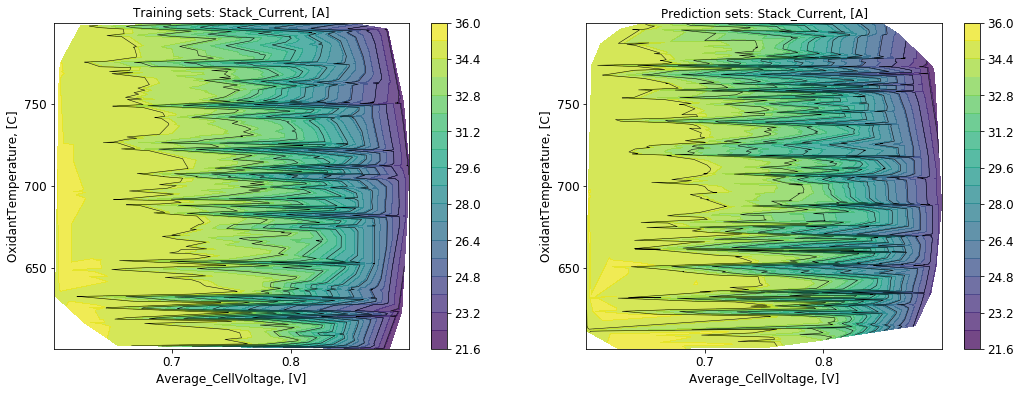

In [16]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'OxidantTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
k.plot_contour_2D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot 3-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



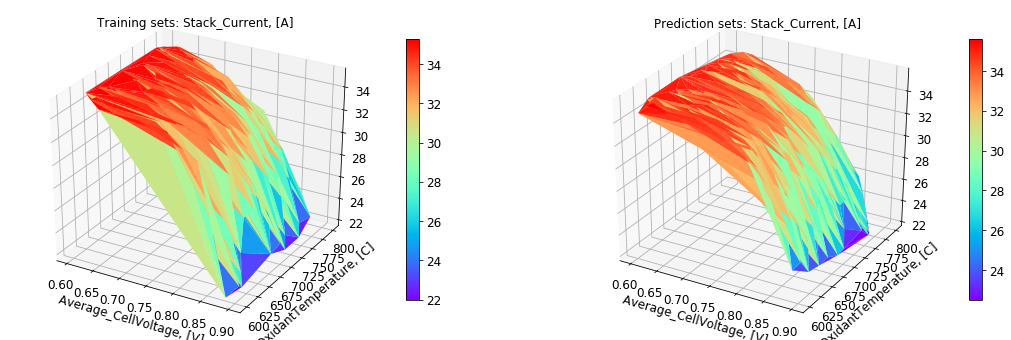

In [17]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'OxidantTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
k.plot_contour_3D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot box plot**
    * it is to study the sensitivity between input and output variables
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the dependent variable name on the Y-axis
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

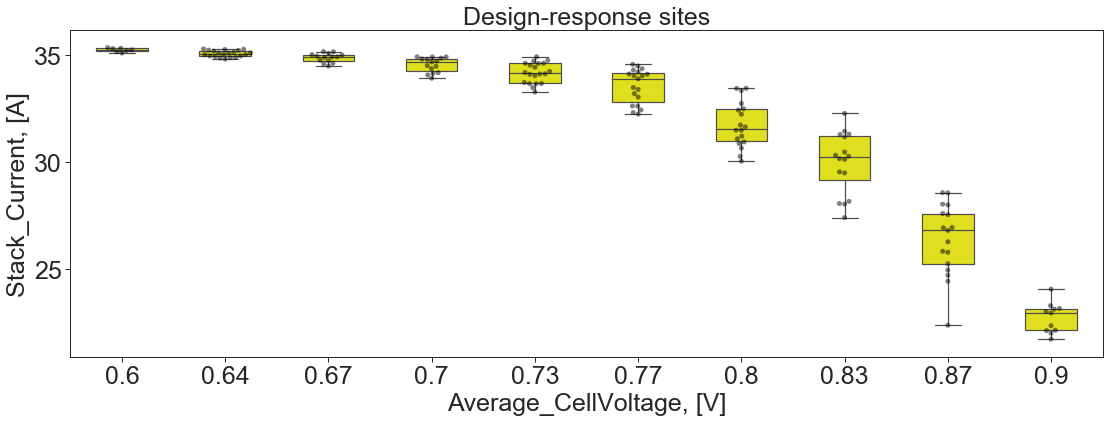

In [18]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'Stack_Current'
saveoption = False
k.plot_box(x_variable_name, y_variable_name, saveoption)

### Step 4b. with DNN method
**This step shares similar functions as Step 4a, but training the ROMs with the DNN regression model**

* Run the cell below to **Create a ROM Job**
    * Assign the working directory for kriging
        * <font color = 'blue'>work_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>allresults</font>: default name of summarized simulation results
    * <font color = 'blue'>allresults_info</font>: default name of supplemental file for the simulation results
    * <font color = 'blue'>intraining</font>: default name of training input file
    * <font color = 'blue'>info</font>: default name of supplemental file for the training input
    * <font color = 'blue'>outtraining</font>: default name of training output file
    * <font color = 'blue'>inprediction</font>: default name of prediction input file
    * <font color = 'blue'>outprediction</font>: default name of prediction output file

In [19]:
work_path = './Test_NW'
allresults = 'allResults_DNN.dat'
allresults_info = 'allResults_DNN_info.dat'
intraining = 'inTraining_DNN.dat'
info = 'info_DNN.dat'
outtraining = 'outTraining_DNN.dat' 
inprediction = 'inPrediction_DNN.dat'
outprediction = 'outPrediction_DNN.dat'
d = pys.DNN(work_path, allresults, allresults_info, 
            intraining, info, outtraining, 
            inprediction, outprediction)

* Run the cell below to **Summarize the Simulation Results**
    * Assign the source directory where the simulation results are
        * <font color = 'blue'>source_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>indcase</font>: the cases which will be summarized for training input file
        * by default, all the cases (<font color = 'green'>[1, 2, 3, ... , <font color = 'blue'>numcase</font>]</font>) are included
        * honestly, the user can select any certain cases (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five cases)
    * <font color = 'blue'>exclude_case</font>: select from <font color = 'green'>-1</font>, <font color = 'green'>0</font> and <font color = 'green'>1</font>
        * <font color = 'green'>-1</font>: include all the cases with results
        * <font color = 'green'>0</font>: exclude failed cases
        * <font color = 'green'>1</font>: exclude failed and non-converged cases
    * <font color = 'blue'>display_detail</font>: = <font color = 'green'>True</font> means displaying the contents of the training input file
    * It will generate <font color = 'green'>allResults.dat</font> and <font color = 'green'>allResults_info.dat</font>

In [20]:
source_path = work_path
indcase = list(range(1, numcase+1)) # [1, 2, 3, ... , numcase]
exclude_case = -1
display_detail = False
d.summarize_SimuResult(source_path, indcase, exclude_case, display_detail)

############################################################              
Summarize simulation results              
############################################################
Simulation results are summarized from 200 cases:
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200

Select from the following input variables for training:
1 : Average_CellVoltag

* Run the cell below to **Build the ROM**
    * <font color = 'blue'>indS</font>: the input variables which will be used for training
        * by default = <font color = 'green'>None</font>, all the input variables are included
        * honestly, the user can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five input variables)
    * <font color = 'blue'>indY</font>: the output variables which will be used for training
        * by default  = <font color = 'green'>None</font>, all the output variables are included
        * The user can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five output variables)
    * <font color = 'blue'>frac4ROM</font>: the fraction of the summarized simulation results to build the ROM, the rest is used for cross-validation
        * by default  = <font color = 'green'>80</font> means 80% of the data are used to build the ROM, 20% are used for cross-validation
    * It will generate the trained model (<font color = 'green'>outTraining.dat.dat</font>) and perform the cross-validation for all the output variables

In [21]:
indS = None
indY = [2, 4, 9, 11, 12, 14]
frac4ROM = 80
filter_enabled = True # enable or not the z-score filter
z_thres = 5 # threshold of the z-score filter
d.buildROM(indS, indY, frac4ROM, filter_enabled, z_thres)

############################################################              
Build the ROM              
############################################################
DNN classification training start ...
training data set size   160  *  3
validation data set size 40  *  3
Epoch: 1 cost = 0.59949   Validation accuracy: 0.65  
Epoch: 101 cost = 0.03011   Validation accuracy: 1.0  
Epoch: 201 cost = 0.01764   Validation accuracy: 1.0  
DNN classification training start ...
training data set size   160  *  3
validation data set size 40  *  3
INFO:tensorflow:Restoring parameters from ./Test_NW/outTraining_DNN_classifier
Epoch: 1 cost = 0.01755   Validation accuracy: 1.0  
Epoch: 101 cost = 0.01120   Validation accuracy: 1.0  
Noise filter: trim 0 rows from a total of 197 rows
DNN ROM training start ...
training data set size   125  *  3
validation data set size 32  *  3
prediction for testing data set size 40  *  3
epoch  1   training cost = 0.86376   validation cost = 1.21113
epoch  101   tr

* Run the cell below to **Estimate the Confidence Intervals of all the Output Variables**
    * <font color = 'blue'>percentage</font>: the confidence percentage

In [22]:
percentage = 95
d.percent2intervl(percentage)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Voltage":[V] 
	95% confidence interval is ± 4.3109E-03	
For "Stack_Current":[A] 
	95% confidence interval is ± 3.8427E-02	
For "Max_Cell_Temperature":[K] 
	95% confidence interval is ± 4.9411E-01	
For "Delta_Cell_Temperature":[K] 
	95% confidence interval is ± 1.7875E+00	
For "Outlet_Fuel_Temperature":[K] 
	95% confidence interval is ±-5.1634E-01	
For "Outlet_Air_Temperature":[K] 
	95% confidence interval is ±-3.7247E-01	
End of code



* Run the cell below to **Estimate the Confidence Intervals of a Certain Output Variable**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells

In [23]:
percentage = 95
variable_name = 'Stack_Current'
d.percent2intervl(percentage, variable_name)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Current":[A] 
	95% confidence interval is ± 3.8427E-02	
End of code



* Run the cell below to **Estimate the Confidence Percentage of a Certain Output Variable**
    * <font color = 'blue'>interval</font>: the confidence interval
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells

In [24]:
interval = 0.002
variable_name = 'Stack_Current'
d.intervl2percent(interval, variable_name)

############################################################              
Confidence Interval to Percentage              
############################################################
For "Stack_Current": [A]
	±0.002 interval has a confidence of 89.53%
End of code



* Run the cell below to **Generate the Prediction Input File** (<font color = 'green'>inPrediction.dat</font>)
    * the length of <font color = 'blue'>listmin</font> and <font color = 'blue'>listmax</font> must be the same as the input variables in kriging input file (<font color = 'green'>inKriging.dat</font>)
    * usually, the user mannually prepares a prediction input file

In [25]:
numsample =200
listmin = [0.6, 600, 600]
listmax = [0.9, 800, 900]
d.Generate_inprediction(numsample, listmin, listmax)

############################################################                
Generate prediction input                
############################################################
Created prediciton input file
End of code



* Run the cell below to **Perform Prediction based on the Trained Model** 
    * It will generate the prediction output file (<font color = 'green'>outPrediction.dat</font>)

In [26]:
d.prediction()

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
DNN classification prediction start ...
prediction for testing data set size  200  *  3
INFO:tensorflow:Restoring parameters from ./Test_NW/outTraining_DNN_classifier
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



* Run the cell below to **Plot 2-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
DNN classification prediction start ...
prediction for testing data set size  200  *  3
INFO:tensorflow:Restoring parameters from ./Test_NW/outTraining_DNN_classifier
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



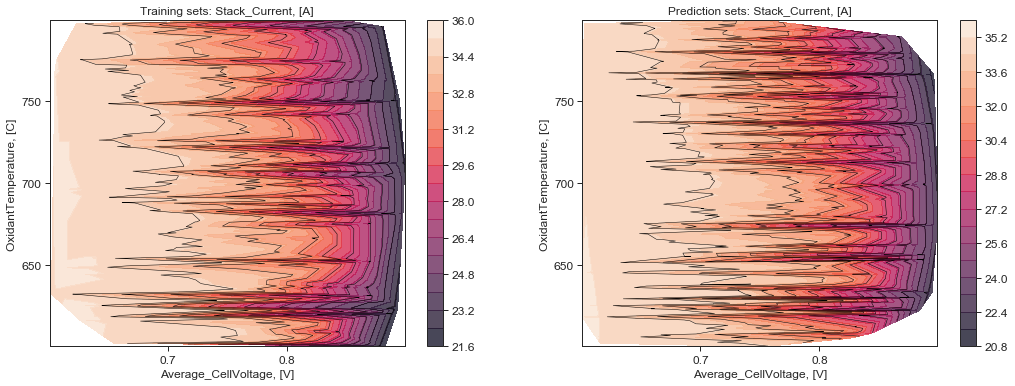

In [27]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'OxidantTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
d.plot_contour_2D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot 3-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
DNN classification prediction start ...
prediction for testing data set size  200  *  3
INFO:tensorflow:Restoring parameters from ./Test_NW/outTraining_DNN_classifier
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



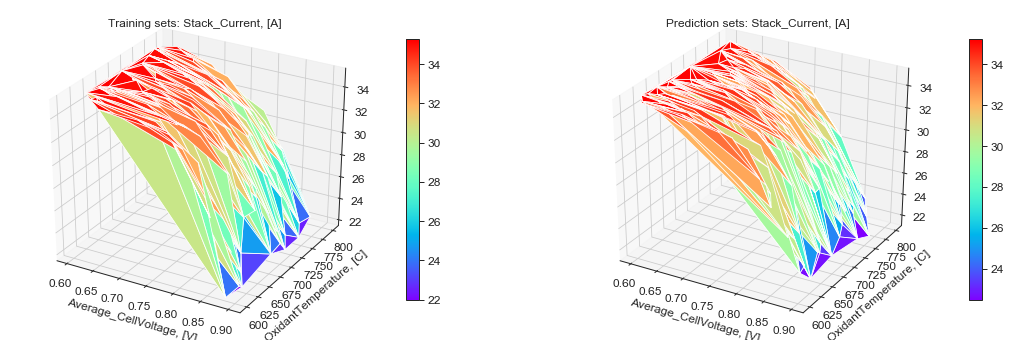

In [28]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'OxidantTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
d.plot_contour_3D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot box plot**
    * it is to study the sensitivity between input and output variables
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the dependent variable name on the Y-axis
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

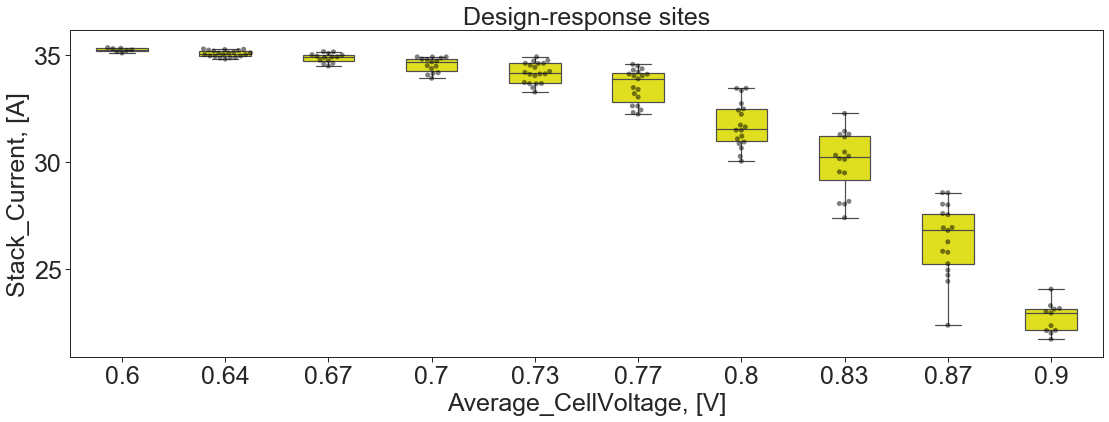

In [29]:
x_variable_name = 'Average_CellVoltage'
y_variable_name = 'Stack_Current'
saveoption = False
d.plot_box(x_variable_name, y_variable_name, saveoption)